In [1]:
import keras
from keras.datasets import cifar10

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

LOAD CIFAR-10 DATASET

In [4]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 1)

SAMPLE ONLY DEER AND HORSE IMAGES

In [9]:
#class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# 4 is DEER, 7 is HORSE

cifar_train_index=[]
for i in range(50000):
    if y_train[i][0] in [4,7]:
        cifar_train_index.append(i)
cifar_test_index=[]
for i in range(10000):
    if y_test[i][0] in [4,7]:
        cifar_test_index.append(i)

In [10]:
cifar_deer_horse_train=X_train[np.array(cifar_train_index)]
cifar_deer_horse_test=X_test[np.array(cifar_test_index)]

cifar_deer_horse_train_labels=y_train[np.array(cifar_train_index)]
cifar_deer_horse_test_labels=y_test[np.array(cifar_test_index)]

In [11]:
cifar_deer_horse_train.shape

(10000, 32, 32, 3)

In [12]:
cifar_deer_horse_test.shape

(2000, 32, 32, 3)

In [13]:
cifar_deer_horse_train_labels.shape

(10000, 1)

In [14]:
cifar_deer_horse_test_labels.shape

(2000, 1)

In [15]:
print(np.unique(cifar_deer_horse_train_labels))
print(np.unique(cifar_deer_horse_test_labels))

[4 7]
[4 7]


READ AND SPLIT BETWEEN TRAIN AND TEST

In [16]:
X_train=cifar_deer_horse_train
y_train=cifar_deer_horse_train_labels
X_test=cifar_deer_horse_test
y_test=cifar_deer_horse_test_labels
num_classes=2

In [17]:
y_train

array([[4],
       [7],
       [4],
       ...,
       [4],
       [7],
       [4]], dtype=uint8)

CHECK AN IMAGE FROM DATASET

In [18]:
ind=100
if y_train[ind]==4:
    label='Deer'
else:
    if y_train[ind]==7:
        label='Horse'

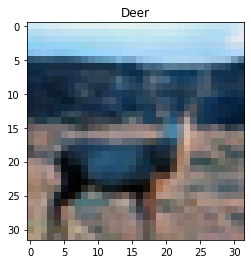

In [19]:
sample_image=X_train[ind]
pixels=sample_image.reshape((32,32,3))
plt.imshow(pixels)
plt.title(label)
plt.show()

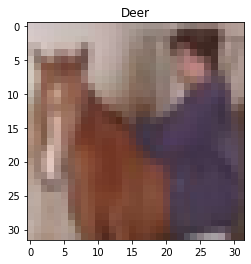

In [20]:
sample_image1=X_test[ind]
pixels=sample_image1.reshape((32,32,3))
plt.imshow(pixels)
plt.title(label)
plt.show()

PREPROCESS INPUT IMAGES

In [21]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

In [22]:
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')

10000 train samples
2000 test samples


In [23]:
#Convert the labels
for ind in range(X_train.shape[0]):
    if y_train[ind]==4:
        y_train[ind]=0 #Deer
    else:
        y_train[ind]=1 #Horse
for ind in range(X_test.shape[0]):
    if y_test[ind]==4:
        y_test[ind]=0 #Deer
    else:
        y_test[ind]=1 #Horse

In [24]:
#Convert class labels to one-hot encoded vector
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [25]:
y_train[:-10]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [26]:
X_train.shape

(10000, 32, 32, 3)

In [27]:
X_train[0,:].shape

(32, 32, 3)

In [28]:
y_train.shape

(10000, 2)

BUILD THE CNN MODEL WITH KERAS

In [29]:
#Parameters = [i × (f×f) × o] + o
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='softmax'))

In [30]:
#Compile model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

SUMMARY OF CNN MODEL

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4

TRAIN THE CNN MODEL

In [32]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=40,batch_size=50,verbose=1)

Epoch 1/40
200/200 [==============================] - 21s 95ms/step - loss: 0.5911 - accuracy: 0.6535 - val_loss: 0.4699 - val_accuracy: 0.7620
Epoch 2/40
200/200 [==============================] - 17s 85ms/step - loss: 0.3872 - accuracy: 0.8307 - val_loss: 0.3499 - val_accuracy: 0.8470
Epoch 3/40
200/200 [==============================] - 17s 85ms/step - loss: 0.3052 - accuracy: 0.8649 - val_loss: 0.3322 - val_accuracy: 0.8585
Epoch 4/40
200/200 [==============================] - 17s 85ms/step - loss: 0.2557 - accuracy: 0.8892 - val_loss: 0.2866 - val_accuracy: 0.8665
Epoch 5/40
200/200 [==============================] - 17s 86ms/step - loss: 0.2001 - accuracy: 0.9180 - val_loss: 0.3063 - val_accuracy: 0.8740
Epoch 6/40
200/200 [==============================] - 19s 96ms/step - loss: 0.1947 - accuracy: 0.9212 - val_loss: 0.2984 - val_accuracy: 0.8815
Epoch 7/40
200/200 [==============================] - 19s 95ms/step - loss: 0.1395 - accuracy: 0.9452 - val_loss: 0.2855 - val_accuracy:

In [33]:
#Display the loss and Accuracy 
history.history

{'loss': [0.5159686207771301,
  0.3661283552646637,
  0.30052193999290466,
  0.25744062662124634,
  0.21240568161010742,
  0.1867334246635437,
  0.14835922420024872,
  0.11166668683290482,
  0.09330993890762329,
  0.07117532938718796,
  0.05299248546361923,
  0.05203250050544739,
  0.03731206804513931,
  0.036745745688676834,
  0.03214665502309799,
  0.03414430096745491,
  0.029096513986587524,
  0.030729610472917557,
  0.01946159079670906,
  0.022827619686722755,
  0.022640766575932503,
  0.01555648073554039,
  0.019145473837852478,
  0.019557960331439972,
  0.02025027759373188,
  0.011422201991081238,
  0.01852584071457386,
  0.018274113535881042,
  0.015698328614234924,
  0.02310783602297306,
  0.015450386330485344,
  0.011107281781733036,
  0.021262915804982185,
  0.01545645296573639,
  0.012348415330052376,
  0.010915462858974934,
  0.011916150338947773,
  0.014872465282678604,
  0.0169454887509346,
  0.015063283033668995],
 'accuracy': [0.7346000075340271,
  0.8432000279426575,
 

LOSS AND ACCURACY BY PLOTTING 

In [34]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Accuracy & Validation Accuracy')

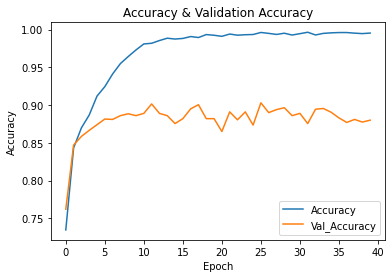

In [35]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Accuracy & Validation Accuracy')

Text(0.5, 1.0, 'Loss & Validation Loss')

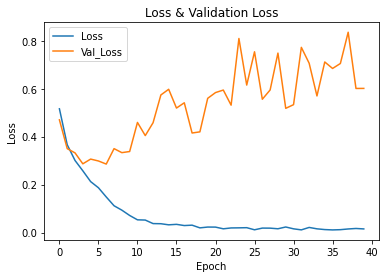

In [36]:
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='Val_Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.title('Loss & Validation Loss')

MAKING PREDICTION

In [37]:
predicted=model.predict(X_test)

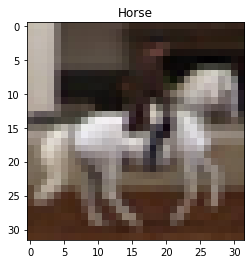

In [38]:
ind=530
sample_image=X_test[ind]
r1=np.argmax(y_test[ind])
if r1==0:
    rlabel='Deer'
else:
    rlabel='Horse'
p1=np.argmax(predicted[ind])
if p1==0:
    plabel='Deer'
else:
    plabel='Horse'
pixels=sample_image.reshape((32,32,3))
plt.imshow(pixels)
plt.title(rlabel)
plt.show()

In [40]:
print('Real Label:{}'.format(rlabel))
print('PredictedLabel:{}'.format(plabel))

Real Label:Horse
PredictedLabel:Horse


In [41]:
labels_test_predicted=np.argmax(predicted,1)
labels_test_predicted

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

CONFUSION MATRIX OF PREDICTION ON TEST SET

In [46]:
pd.crosstab(np.argmax(y_test,axis=1),labels_test_predicted)

col_0,0,1
row_0,,
0,928,72
1,168,832


EVALUTAION OF TEST DATA SET

In [44]:
score=model.evaluate(X_test,y_test,verbose=1)
print('Test Loss:',score[0])
print('Test Accuracy:',score[1])

63/63 [==============================] - 2s 26ms/step - loss: 0.6011 - accuracy: 0.8800 
Test Loss: 0.6010979413986206
Test Accuracy: 0.8799999952316284
